In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [2]:
file_one = "../../Original_Project/Draft_data/collegeOne.csv"
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")

In [3]:
file_one_df.head()

,Unnamed: 0,Rnd,Pick,Age,To,CareerAV,DraftedAV,GamesPlayed,Pass Completions,Pass Attempts,...,Rushing Yards,Rushing Touchdowns,Receptions,Receiving Yards,Receiving Touchdowns,Solo,Interceptions (DEF),Sacks,College,College_code
0,0,1,1,23.0,2017.0,108.0,61.0,182.0,21.653846,34.653846,...,2.604396,0.043956,0.000000,0.000000,0.000000,0.005495,0.000000,0.000000,USC,251
1,1,1,2,22.0,2005.0,4.0,4.0,15.0,0.000000,0.000000,...,1.133333,0.000000,2.400000,29.333333,0.266667,0.000000,0.000000,0.000000,Michigan St.,134
2,2,1,3,22.0,2016.0,95.0,93.0,193.0,0.000000,0.000000,...,0.279793,0.000000,5.502591,73.497409,0.362694,0.005181,0.000000,0.000000,Miami (FL),131
3,3,1,4,21.0,2008.0,34.0,31.0,92.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.119565,0.000000,0.173913,Kentucky,108
4,4,1,5,25.0,2017.0,71.0,50.0,221.0,0.000000,0.000000,...,0.018100,0.000000,0.000000,0.000000,0.000000,3.389140,0.190045,0.009050,Kansas St.,106


In [6]:
data = file_one_df.drop(["College"], axis=1)
data

,Unnamed: 0,Rnd,Pick,Age,To,CareerAV,DraftedAV,GamesPlayed,Pass Completions,Pass Attempts,...,Rushing Attempts,Rushing Yards,Rushing Touchdowns,Receptions,Receiving Yards,Receiving Touchdowns,Solo,Interceptions (DEF),Sacks,College_code
0,0,1,1,23.0,2017.0,108.0,61.0,182.0,21.653846,34.653846,...,1.653846,2.604396,0.043956,0.000000,0.000000,0.000000,0.005495,0.000000,0.000000,251
1,1,1,2,22.0,2005.0,4.0,4.0,15.0,0.000000,0.000000,...,0.133333,1.133333,0.000000,2.400000,29.333333,0.266667,0.000000,0.000000,0.000000,134
2,2,1,3,22.0,2016.0,95.0,93.0,193.0,0.000000,0.000000,...,0.119171,0.279793,0.000000,5.502591,73.497409,0.362694,0.005181,0.000000,0.000000,131
3,3,1,4,21.0,2008.0,34.0,31.0,92.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.119565,0.000000,0.173913,108
4,4,1,5,25.0,2017.0,71.0,50.0,221.0,0.000000,0.000000,...,0.004525,0.018100,0.000000,0.000000,0.000000,0.000000,3.389140,0.190045,0.009050,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,4583,7,250,22.0,2020.0,1.0,1.0,12.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47
4141,4584,7,251,23.0,2020.0,0.0,0.0,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109
4142,4585,7,252,22.0,2020.0,0.0,0.0,10.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.600000,6.300000,0.000000,0.100000,0.000000,0.000000,69
4143,4587,7,254,24.0,2020.0,1.0,1.0,9.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.444444,0.000000,0.000000,170


In [7]:
X = StandardScaler().fit_transform(data)
X

array([[-1.7363703 , -1.51967849, -1.65794028, ..., -0.38750352,
        -0.40756666,  1.29552451],
       [-1.73561395, -1.51967849, -1.64411752, ..., -0.38750352,
        -0.40756666, -0.14303914],
       [-1.73485759, -1.51967849, -1.63029477, ..., -0.38750352,
        -0.40756666, -0.17992539],
       ...,
       [ 1.73151959,  1.50871927,  1.81157128, ..., -0.38750352,
        -0.40756666, -0.94224117],
       [ 1.7330323 ,  1.50871927,  1.83921679, ..., -0.38750352,
        -0.40756666,  0.29959583],
       [ 1.73378866,  1.50871927,  1.85303955, ..., -0.38750352,
         0.53697494, -0.83158243]])

In [8]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [9]:
centers = model.cluster_centers_
centers

array([[ 0.76747062, -0.57285418, -0.56580459, -0.18002445,  0.62102606,
        -0.38336947, -0.3135556 , -0.35093279, -0.17205684, -0.17359048,
        -0.17104987, -0.15816991, -0.15723826, -0.25711822, -0.25261446,
        -0.24046733, -0.36122179, -0.3359349 , -0.30152831,  0.05051585,
        -0.17319655,  0.08258841, -0.11637861],
       [ 0.10277383, -1.21244973, -1.26819868, -0.30038999,  0.80684313,
         2.324818  ,  2.08258358,  0.89777188,  7.10295787,  6.81839433,
         7.271171  ,  7.86832794,  4.79958132,  1.21964166,  1.31688955,
         1.79917945, -0.41782339, -0.38854523, -0.31489662, -0.7336234 ,
        -0.38750352, -0.40756666, -0.02890561],
       [-0.64833527, -0.64700935, -0.65030018,  0.10389264,  0.16501007,
         1.31821758,  1.15458786,  1.38833182, -0.1788537 , -0.18175748,
        -0.17700651, -0.16168393, -0.17281548, -0.27237389, -0.26475538,
        -0.24012613, -0.41374772, -0.38216875, -0.33261733, -0.31851984,
        -0.33985578, -0.0425

In [19]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=12)

# # Fit the model to the data
# kmeans.fit(X)

# # Use the data to predict the clusters
# # save the predictions as `predicted_clusters`
# predicted_clusters = kmeans.predict(X)

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12)

In [31]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
predicted_clusters = kmeans.predict(X)

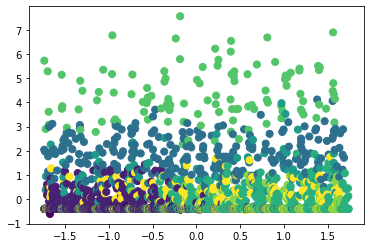

In [37]:
plt.scatter(X[:, 0], X[:, 17], c=predicted_clusters, s=50, cmap='viridis')
plt.savefig("../Static/images/Graphs/kmeans.png")
plt.show()